Back to the main [Index](../index.ipynb)

In [11]:
from __future__ import division, print_function, unicode_literals
from abipy.abilab import *

%matplotlib notebook

# ABINIT documentation

To get the database of ABINIT variables

In [12]:
database = abilab.get_abinit_variables()

To get the documentation for the `ecut` variable

In [13]:
database["ecut"]

ecut  <Energy CUToff>

To list all the ABINIT variables related to `ecut`

In [14]:
database.apropos("ecut")

[accuracy  <ACCURACY>,
 bs_haydock_niter  <Bethe-Salpeter HAYDOCK Number of Iterations>,
 bs_haydock_tol  <Bethe-Salpeter HAYDOCK TOLerance>,
 cd_frqim_method  <Contour Deformation Imaginary Frequency integration Method>,
 dfpt_sciss  <DFPT SCISSor operator>,
 diecut  <DIElectric matrix Energy CUToff>,
 dilatmx  <DILATation : MaXimal value>,
 ecut  <Energy CUToff>,
 ecuteps  <Energy CUT-off for EPSilon (the dielectric matrix)>,
 ecutsigx  <Energy CUT-off for SIGma eXchange>,
 ecutsm  <Energy CUToff SMearing>,
 ecutwfn  <Energy CUT-off for WaveFunctions>,
 elph2_imagden  <ELectron-PHonon interaction at 2nd order : IMAGina y shoft of the DENominator>,
 eshift  <Energy SHIFT>,
 esmear  <Eigenvalue SMEARing>,
 fftgw  <FFT for GW calculation>,
 iprcel  <Integer for PReConditioning of ELectron response>,
 iscf  <Integer for Self-Consistent-Field cycles>,
 istwfk  <Integer for choice of STorage of WaveFunction at each k point>,
 kptopt  <KPoinTs OPTion>,
 mpw  <Maximum number of Plane Waves>,

Command line interface available via the `abidoc.py` script

In [15]:
!abidoc.py --help

usage: abidoc.py [-h] [-V] {man,apropos,find,withdim,list} ...

optional arguments:
  -h, --help            show this help message and exit
  -V, --version         show program's version number and exit

subcommands:
  Valid subcommands

  {man,apropos,find,withdim,list}
                        sub-command help
    man                 Show documentation for varname.
    apropos             Find variables related to varname.
    find                Find all variables whose name contains varname.
    withdim             Find all arrays depending on the given dimension.
    list                List all variables.

Usage example:
    abidoc.py man ecut        --> Show documentation for ecut input variable.
    abidoc.py apropos ecut    --> To search in the database for the variables related to ecut.
    abidoc.py find paw        --> To search in the database for the variables whose name contains paw
    abidoc.py list            --> Print full list of variables
    abidoc.py withdim natom 

# Unit Conversion

In [16]:
# Hartree in eV
Energy(1, "Ha").to("eV")

27.211386020632837

In [17]:
# To convert a force in Ha/bohr into eV/Angstrom 
FloatWithUnit(1.1, "Ha bohr^-1").to("eV ang^-1")

56.56427378041859

See other examples at http://pymatgen.org/_static/Units.html

# Equation of State (EOS)

All models:
 birch_murnaghan, pourier_tarantola, vinet, deltafactor, quadratic, murnaghan, birch 

EOS_fit: <function birch_murnaghan at 0x10e0dbb18>
e0, b0, b1, v0
[-1536.51882361    94.88225141    -1.65195087     2.45113025]
Equation of State: birch_murnaghan
Minimum volume = 2.45 Ang^3
Bulk modulus = 94.88 eV/Ang^3 = 15201.81 GPa, b1 = -1.65


<IPython.core.display.Javascript object>


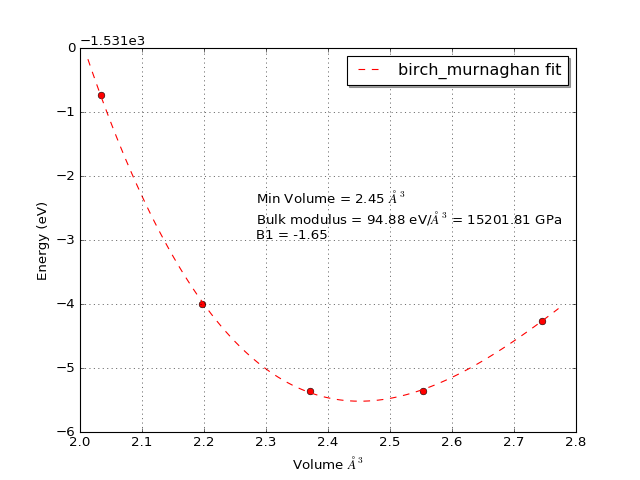

EOS_fit: <function murnaghan at 0x10e0dba28>
e0, b0, b1, v0
[-1536.50733906    89.92338272     4.75293135     2.45583472]
Equation of State: murnaghan
Minimum volume = 2.46 Ang^3
Bulk modulus = 89.92 eV/Ang^3 = 14407.31 GPa, b1 = 4.75


<IPython.core.display.Javascript object>


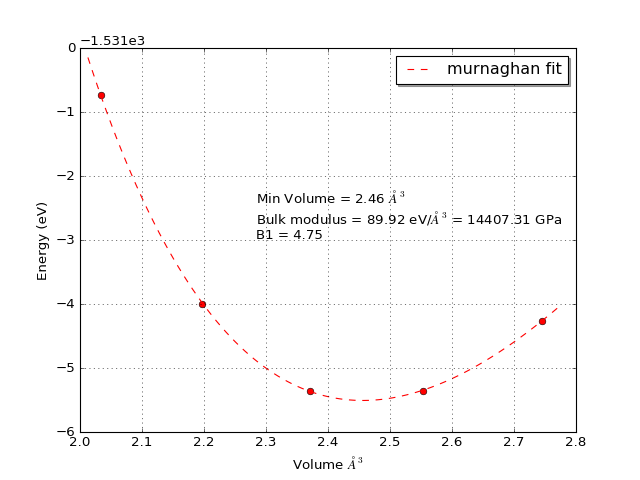

In [18]:
# This example shows how to compute the equation of state by 
# fitting the total energy as function of the unit cell volume.
# list of available models
print("All models:\n", ", ".join(EOS.MODELS.keys()), "\n")

# Extract volumes and energies from the output files of the calculation.
# Here we use hardcoded values.
volumes = [13.72, 14.83, 16.0, 17.23, 18.52]
energies = [-56.29, -56.41, -56.46, -56.46, -56.42]

for eos_name in ["birch_murnaghan", "murnaghan"]:
   eos = EOS(eos_name=eos_name)

   # Note that eos.fit expects lengths in Angstrom, energies are in eV.
   # To specify different units use len_units and ene_units 
   fit = eos.fit(volumes, energies, vol_unit="bohr^3", ene_unit="Ha")

   print(fit)
   fit.plot()